## Loading the dataset

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [43]:
df = pd.read_csv('train_values.csv')
trainval = pd.read_csv('train_labels.csv')
testdf = pd.read_csv('test_values.csv')
testlabels = pd.read_csv('submission_format.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [45]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df.duplicated().any()

False

In [47]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df['building_id'].nunique()

260601

In [49]:
trainval['building_id'].nunique()

260601

In [50]:
totaldf = pd.merge(df, trainval, on='building_id')

In [51]:
totaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [52]:
totaldf.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [53]:
totaldf.drop('building_id', inplace=True,axis=1)

In [54]:
totaltestdf = pd.merge(testdf, testlabels,on='building_id')

In [55]:
totaltestdf.drop('building_id', inplace=True,axis=1)

## EDA

In [56]:
pd.value_counts(totaldf.damage_grade)

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

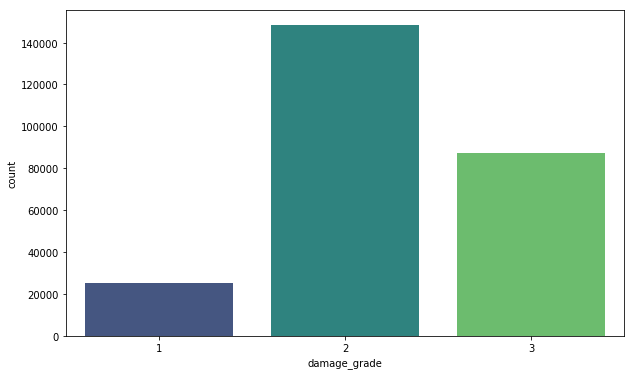

In [57]:
fig = plt.subplots(figsize=(10,6))
sns.countplot(totaldf.damage_grade, palette = 'viridis')
plt.show()

This shows that majority of buildings faced moderate to severe damage

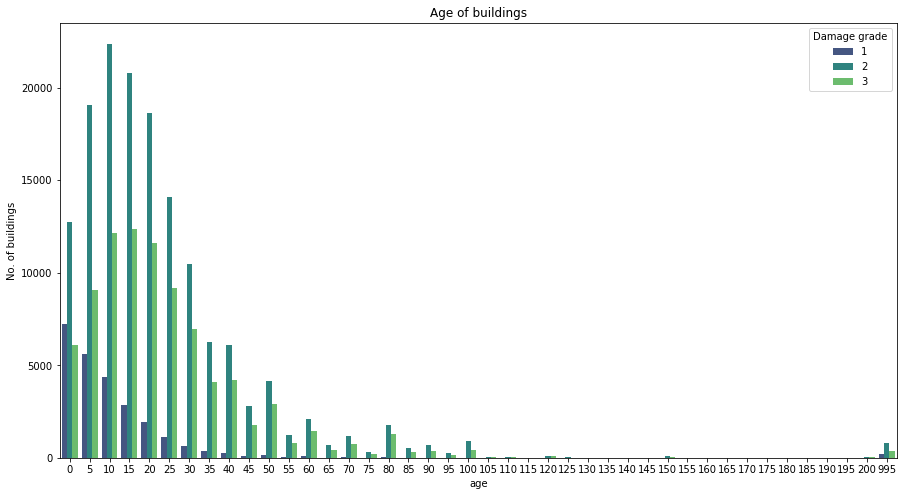

In [58]:
plt.figure(figsize=(15,8))
sns.countplot(x=totaldf['age'], hue=totaldf['damage_grade'], palette='viridis')
plt.ylabel('No. of buildings')
plt.title('Age of buildings')
plt.legend([1,2,3], loc='upper right', title = 'Damage grade')
plt.show()

We can see that the age most of the affected buildings is under 50. Despite the age, most of the buildings faced a damage of second degree

<Figure size 1080x1080 with 0 Axes>

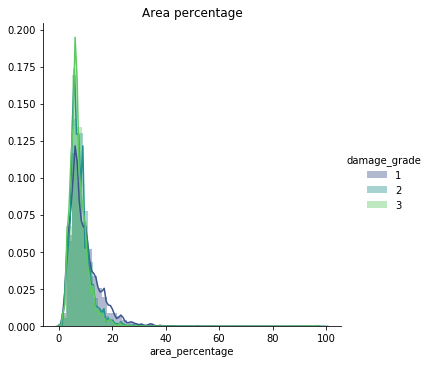

In [59]:
plt.figure(figsize=(15,15))
sns.FacetGrid(totaldf, hue='damage_grade', height=5, palette = 'viridis')\
    .map(sns.distplot,'area_percentage')\
    .add_legend()
plt.title('Area percentage')
plt.show()

We can see that as area increases, the damage to the building also increases

<Figure size 1080x1080 with 0 Axes>

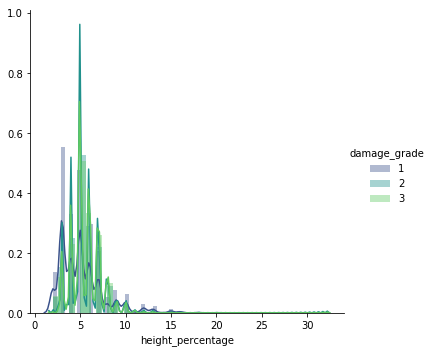

In [60]:
plt.figure(figsize=(15,15))
sns.FacetGrid(totaldf, hue='damage_grade', height=5, palette = 'viridis')\
    .map(sns.distplot,'height_percentage')\
    .add_legend()
plt.show()

The damage to the building increases as height increases

In [61]:
totaldf.dtypes.value_counts()

int64     31
object     8
dtype: int64

In [62]:
totaltestdf.dtypes.value_counts()

int64     31
object     8
dtype: int64

In [63]:
objcols=[]
for col in totaldf.columns:
    if totaldf[col].dtype == 'object':
        objcols.append(col)
print(objcols)

['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']


In [64]:
objcolstest=[]
for col in totaltestdf.columns:
    if totaldf[col].dtype == 'object':
        objcolstest.append(col)
print(objcolstest)

['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']


In [65]:
def transform_to_int(totaldf, objcols):
    d_lsc = {'n':0, 'o':1, 't':2}
    d_ft= {'h':0,'i':1,'r':2,'u':3, 'w':4}
    d_rt= {'n':0, 'q':1,'x':2}
    d_gft= {'f':0,'m':1,'v':2,'x':3,'z':4}
    d_oft= {'j':0, 'q':1, 's':2, 'x':3}
    d_pos= {'j':0,'o':1,'s':2,'t':3}
    d_pc= {'a':0, 'c':1, 'd':2, 'f':3, 'm':4, 'n':5, 'o':6, 'q':7, 's':8, 'u':9}
    d_los= {'a':0, 'r':1, 'v':2, 'w':3}
    replacements = [d_lsc,d_ft,d_rt,d_gft,d_oft,d_pos,d_pc,d_los]
    
    for i,col in enumerate(objcols):
        totaldf[col] = totaldf[col].map(lambda a: replacements[i][a]).astype('int64')
        

In [66]:
transform_to_int(totaldf,objcols)
transform_to_int(totaltestdf,objcolstest)

In [67]:
totaldf.dtypes.value_counts()

int64    39
dtype: int64

In [68]:
totaltestdf.dtypes.value_counts()

int64    39
dtype: int64

## Building the model

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [70]:
y_train = totaldf.pop('damage_grade')
x_train = totaldf.copy()
y_test = totaltestdf.pop('damage_grade')
x_test = totaltestdf.copy()

In [71]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(260601, 38) (86868, 38) (260601,) (86868,)


In [72]:
rcf=RandomForestClassifier()
model = rcf.fit(x_train, y_train)
model.score(x_test,y_test)

C:\Users\sarve\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.08435787631809182

In [73]:
y_pred = model.predict(x_test)

In [74]:
f1_score(y_test,y_pred,average='micro')

0.08435787631809182

In [75]:
y_train.unique()

array([3, 2, 1], dtype=int64)

In [76]:
y_test.unique()

array([1], dtype=int64)

The test set has only one of the three classes. So, we need to split the data to train and test set so that all classes are present in the test data too.

In [78]:
y = y_train.copy()
x = x_train.copy()

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(195450, 38) (65151, 38) (195450,) (65151,)


In [80]:
rf = RandomForestClassifier()
model = rf.fit(x_train, y_train)
model.score(x_test, y_test)

C:\Users\sarve\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6984390109131096

In [81]:
y_pred = model.predict(x_test)

In [82]:
f1_score(y_test,y_pred,average='micro')

0.6984390109131096

In [83]:
importance = pd.DataFrame({'Feature':list(x), 'Importance': rf.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)
importance

,Feature,Importance
2,geo_level_3_id,0.154725
1,geo_level_2_id,0.137465
0,geo_level_1_id,0.137308
4,age,0.123360
5,area_percentage,0.108722
6,height_percentage,0.057624
26,count_families,0.026004
9,roof_type,0.024553
12,position,0.022222
8,foundation_type,0.020485


In [84]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
adamodel = ada.fit(x_train, y_train)
adamodel.score(x_test, y_test)

0.6452855673742537

## Hyperparameter tuning

In [85]:
parameters = {'max_depth': [5,10,20,40,80]}

In [86]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf, parameters, scoring='f1_micro',n_jobs=-1, verbose=3)

In [87]:
grid_result = grid_search.fit(x,y)

C:\Users\sarve\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    7.9s remaining:   11.9s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:   16.0s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   17.0s finished


In [88]:
grid_result.best_params_

{'max_depth': 40}

In [89]:
rf1= RandomForestClassifier(max_depth=40)
model = rf1.fit(x_train, y_train)
model.score(x_test, y_test)

C:\Users\sarve\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6986385473745607

In [90]:
y_pred = model.predict(x_test)

In [91]:
f1_score(y_test, y_pred, average='micro')

0.6986385473745607